Sabemos que para discretizar una señal cuasi-periódica debemos calcular la frecuencia de muestreo en relación a la frecuencia más alta. Ya que nos dan las velocidades angulares 

$$
\omega_1 = 4\\
\omega_2 = 5\\
\omega_3 = 10\\
$$
Sabemos que la frecuencia es proporcional a la velocidad angular, por lo que tomaremos a $\omega_3$.

Gracias al teorema de Nyquist sabemos que para evitar aliasing:
$$
F_s \geq 2 F_0
$$
Ya que $f = \frac{\omega}{2\pi}$, reemplazamos en la ecuación anterior:
$$
F_s \geq 2 \frac{\omega}{2\pi} = \frac{\omega}{\pi}
$$
Reemplazando $\omega = \omega_3 = 10$
$$
F_s \geq \frac{10}{\pi} \approx 3.18309886
$$
Ya que cualquier frecuencia mayor a $\frac{10}{\pi}$ nos sirve, escogeremos:
$$
F_s = \frac{11}{pi}
$$

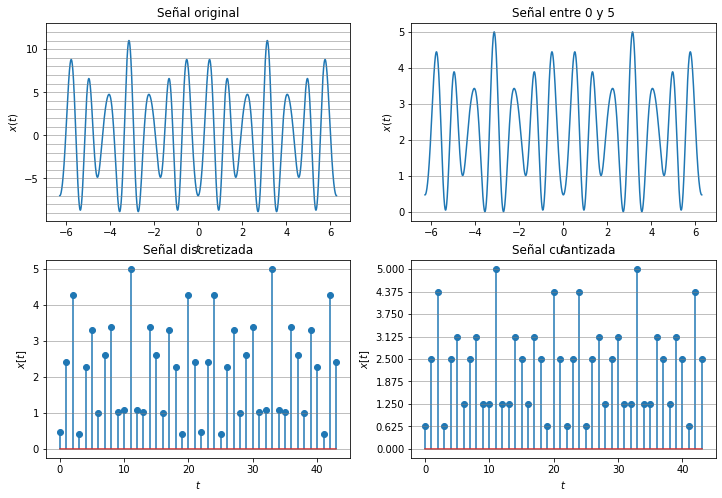

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy import signal

def my_ceropen(x,ymin = -5, ymax = 5):
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv 

def digitalizar(x,xMin,xMax,dur,Fs=10,nbits=8):
  """
  Recibe una señal 'continua' y la escala, discretiza de acuerdo a una frecuencia
  de muestreo y la cuantiza de acuerdo a la resolución en bits que designamos, 
  se retorna  una nueva señal digitalizada
  """
  # Escalar la señal
  xEsc = my_ceropen(x,xMin,xMax)
  # Discretizar la señal
  # Ya que la función resample no acepta que su argumento sea un flotante, se 
  # Convierte a entero con el operador int
  xDis = signal.resample(xEsc,int(dur*Fs))

  # Cuantizar la señal
  # Se crea una matriz que en cada fila va a contener uno de los posibles estados de salida
  # Al stop del arange se le agrega un número muy pequeño para hacer que pueda incluír a xMax.
  bits = np.arange(xMin,xMax+0.0000001,(xMax-xMin)/(2**nbits)).reshape(-1,1)
  # Se calcula la distancia entre cada dato de la señal con cada posible estado
  dist = cdist(xDis.reshape(-1,1),bits)
  # Se retornan los índices del valor más pequeño de cada columna
  positions = np.argmin(dist,axis=1)

  # Iterando sobre cada una de los datos, se añade a la lista xCuant el estado correspondiente
  # A la posición indicada por la función np.argmin
  xCuant = np.zeros(positions.size)
  for i in range(len(xCuant)):
    xCuant[i] = bits[positions[i]]
  

  # Retornamos la señal digitalizada
  return xCuant


  
# Definición de los parámetros de la señal simulada

#Vamos a dibujar 2 períodos de la señal centrados en 0, ya que T = 2*pi:
Ti, Tf = -2*np.pi, 2*np.pi

#Defninimos la frecuencia de muestreo calculada anteriormente
Fs = 11/np.pi

# Definición señal original
t = np.linspace(Ti,Tf,int(Tf-Ti)*10000)
x = 7*np.sin(7*t-np.pi/2) - 2 * np.cos(5*t) + 2*np.cos(10*t)

#### ====== ACLARACIÓN IMPORTANTE ====== ##
# Aunque los proceso de cero y pendiente junto a discretización son realizados
# en la función discretizar, dado que dicha función solo retorna la señal digitalizada
# y queremos visualizar todas las etapas. Entonces repetimos estos pasos para 
# conservar las otras señales y poderlas visualizar.


# Dado que la señal deberá tener una salida entre 0 y 5
# Se debe acomodar para que trabaje en este intervalo
xEscalada = my_ceropen(x,0,5)

# Mediante la función resample, se discretiza la señal de acuerdo a Fs

xDisc = signal.resample(xEscalada,int((Tf-Ti)*Fs))

xCuant = digitalizar(x,0,5,Tf-Ti,Fs,3)


# Generación de la gráfica
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.title("Señal original")

plt.plot(t,x)
plt.xlabel("$t$")
plt.ylabel("$x(t)$")
for i in range(12,-10,-1):
  plt.axhline(y = i, xmin = 0, xmax = 10, color = 'gray', linewidth = 0.5)


plt.subplot(2,2,2)
plt.title("Señal entre 0 y 5")

plt.plot(t,xEscalada)
plt.xlabel("$t$")
plt.ylabel("$x(t)$")
for i in range(6):
  plt.axhline(y = i, xmin = 0, xmax = 10, color = 'gray', linewidth = 0.5)
  
plt.subplot(2,2,3)
plt.title("Señal discretizada")

plt.stem(xDisc)
plt.xlabel("$t$")
plt.ylabel("$x[t]$")
for i in range(6):
  plt.axhline(y = i, xmin = 0, xmax = 10, color = 'gray', linewidth = 0.5)

plt.subplot(2,2,4)
plt.title("Señal cuantizada")

plt.stem(xCuant)
plt.xlabel("$t$")
plt.ylabel("$x[t]$")
xTicks = np.arange(0,5.00001,5/2**3)
plt.yticks(xTicks)
for i in xTicks: #Genera los 2**numBits ticks, se le suma 1 para que incluya al último número
  plt.axhline(y = i, xmin = 0, xmax = 10, color = 'gray', linewidth = 0.5)